## Computational Physics 2 (WS23/24) – Warm-up exercise

**Deadline: 31.10.2023 at 23:59**

Group: *write group name*
Students: *write names and matriculation numbers*

You will implement and test two algorithms: **conjugate gradient** and **power method**. We will see in a moment what they are useful for. Fill the notebook following the instructions.

### Initialization

Here we load the needed libraries and we initialize the random number generator. **Important**: when using a random number generator, the seed needs to be set only once, preferebly at the beginning of the program.

In [2]:
import numpy as np

rng = np.random.Generator(np.random.PCG64(12345))

### Positive-definite matrices

Both algorithms will deal with hermitian positive-definite matrices. Recall:

- Given a complex square matrix $A$, its hermitian conjugate $A^\dagger$ is defined as its transposed complex-conjugated, i.e. $(A^\dagger)_{ij} = (A_{ji})^*$.
- A complex square matrix $A$ is said to be hermitian if $A=A^\dagger$.
- An hermitian matrix $A$ is said to be positive-definite if all its eigenvalues are positive.

The following function generates and returns a random positive-definite matrix, along with its eigenvactors and eigenvalues.

In [3]:
# The function 'generate_positive_definite_matrix' contructs an NxN positive-definite matrix 'A',
# its matrix of eigenvectors and its eigenvalues.
#
# Input parameters:
#    N (integer)        : size of output matrix 'A'
#    kappa (double)     : condition number of the output matrix 'A'
#                         see https://en.wikipedia.org/wiki/Condition_number#Matrices
# Output values: (A, U, evalues)
#    A (np.matrix)      : positive-definite NxN matrix with condition number kappa
#    U (np.matrix)      : NxN unitary matrix; each column of 'U' is an eigenvector of 'A'
#    evalues (np.array) : N-component array with eigenvalues of 'A'

def generate_positive_definite_matrix(N,kappa=10.):
    assert isinstance(N, int) and N > 1 , "N=" + str(N) + " must be an integer >= 2"
    assert isinstance(kappa, float) and kappa > 0. , "kappa=" + str(kappa) + " must be a positive float"
    
    rmat = np.asmatrix(rng.standard_normal(size=(N,N)) + 1j * rng.standard_normal(size=(N,N)))
    U , _ = np.linalg.qr(rmat,mode='complete')
    evalues = np.concatenate((1. + kappa*rng.random(N-2),[1.,kappa]))
    D = np.asmatrix(np.diag(evalues))
    A = np.matmul(np.matmul(U,D),U.getH())
    
    return A, U , evalues
array_data = generate_positive_definite_matrix(3,)
test_array = array_data[0]

print(array_data)

(matrix([[ 6.63369501+0.00000000e+00j,  0.10192029+8.05108385e-01j,
          2.29738018+2.12407240e+00j],
        [ 0.10192029-8.05108385e-01j,  9.55564963+0.00000000e+00j,
         -1.48238402+8.30301448e-02j],
        [ 2.29738018-2.12407240e+00j, -1.48238402-8.30301448e-02j,
          3.149937  +2.77555756e-17j]]), matrix([[-0.49245987-0.67543881j,  0.4798027 +0.12202387j,
         -0.22491397+0.07469228j],
        [-0.08964052-0.26265005j, -0.14041223+0.12427599j,
          0.87170923+0.35769042j],
        [-0.47307991-0.02099075j, -0.73487746+0.42390393j,
         -0.23657736+0.00682j   ]]), array([ 8.33928163,  1.        , 10.        ]))


### Power method

Given a positive-definite matrix $A$, the power method allows to approximate its largest eigenvalue and the corresponding eigenvector with a certain specified tolerance $\epsilon$. It is an iterative method: a number of steps are repeated cyclically, at each iteration one gets a better approximation of the eigenvalue and eigenvectors, the iteration is stopped when the approximation is good enough. It works as follows:

1. Generate a random complex vector $v$ with norm equal to 1.
2. Calculate $w=Av$ and $\mu = \| w \|$.
3. If $\| w - \mu v \| < \epsilon$, stop iteration and returns $\mu$ and $v$ are eigenvalue and eigenvector.
4. Replace $v \leftarrow \mu^{-1} w$ and repeat from 2.

**Task:** Implement the power method within the function ```power_method```, with the following specifications.

The *vector* $v$ is not necessarily a one-dimensional array, we want the flexibility to use more abstract vector spaces whose elements are generic $d$-dimensional arrays. In practice, the *vectors* $v$ must be implemented as ```numpy.ndarrays```. In this setup, the squared norm $\|v\|^2$ of the *vector* $v$ is given by the sum of the squared absolute value of all elements of $v$. Moreover, the *matrix* $A$ really needs to be thought as a linear function acting on the elements of the abstract vector space.

```power_method``` must be a function that takes three inputs:
- ```vshape``` is the shape of the elements $v$ of the abstract vector space;
- ```apply_A``` is a function that takes the vector $v$ (represented as an instance of ```numpy.ndarrays```) and returns the vector $Av$ (represented as an instance of ```numpy.ndarrays``` with the same shape as $v$);
- ```epsilon``` is the tolerance.

```power_method``` must return:
- the largest eignevalue $\mu$;
- the corresponding eigenvector (represented as an instance of ```numpy.ndarrays``` with the same shape as the input of ```apply_A```);
- the number of iterations.

A test function is provided below. Your implementation of ```power_method``` needs to pass this test.

In [4]:
# The function 'power_method' calculates an approximation of the largest eigenvalue 'mu'
# and corresponding eigenvector 'v' of the positive-definite linear map 'A'. The quality
# of the approximation is dictated by the tolerance 'epsilon', in the sense that the
# approximated eigenvalue and eigenvector satisfy
#   | A(v) - mu*v | < epsilon
#
# The vectors over which 'A' acts are generically d-dimensional arrays. More precisely,
# they are instances of 'numpy.ndarray' with shape 'vshape'.
#
# The linear map 'A' is indirectly provided as a function 'apply_A' which takes a vector
# v and returns the vector A(v).
#
# Input parameters of power_method:
#    vshape (tuple of ints) : shape of the arrays over which 'A' acts
#    apply_A (function)     : function v -> A(v)
#    epsilon (float)        : tolerance
# Output values: (mu, v, niters)
#    mu (float)             : largest eigenvalue of A
#    v (numpy.ndarray)      : corresponding eigenvector
#    niters (int)           : number of iterations

#function to generate random int for v shape
# number = rng.random(size=(1,2))
# print(number)
# v = rng.standard_normal(size=(2,2)) + 1j * rng.standard_normal(size=(2,2))

In [5]:
# def generate_random_vector(Ashape):
#     assert isinstance(Ashape,tuple) , "Ashape must be a tuple"
#     m = int(abs(rng.standard_normal()*10))
#     n = int(abs(rng.standard_normal()*10))
#     k = int(abs(rng.standard_normal()*10))
#     #v = rng.standard_normal(size=(Ashape[0],Ashape[1],)) + 1j * rng.standard_normal(size=(Ashape[0], Ashape[1]))
#     v = rng.standard_normal(size=Ashape) + 1j * rng.standard_normal(size=Ashape)
#     return v

# random_vector = generate_random_vector(test_array.shape)
# print("start vector: ",random_vector.shape)
# # def multiply_vector(array,vector):
# #     Av = np.dot(array,vector)
# #     return Av
def apply_A(vector):
    global test_array
    assert isinstance(vector,np.ndarray) , "v must be an np.ndarray"
    assert vector.shape==test_array.shape , "v has shape "+str(vector.shape)+", it must have shape "+str(test_array.shape)
    return np.asarray(np.dot(test_array,vector)).reshape(test_array.shape)
#print(multiply_vector(array,random_vector))

def power_method(vshape,apply_A,epsilon,max_iters=1000000):
    #global random_vector
    assert callable(apply_A) , "apply_A must be a function"
    assert isinstance(epsilon, float) and epsilon > 0. , "epsilon=" + str(epsilon) + " must be a positive float"
    assert isinstance(vshape,tuple) , "vshape must be a tuple"
    v = rng.standard_normal(size=vshape) + 1j * rng.standard_normal(size=vshape)
    print("start vector shape: ",v.shape)
    niters = 0

    #compute values before initializing loop

    #v= random_vector
    #print('v: ',v)

    v needs to be norm 1
    mu = np.linalg.norm(apply_A(v))    
    #print('mu: ',mu)
    w = apply_A(v)
    #print('w: ',w)
    epsy = np.linalg.norm(w - np.dot(mu,v))
    mu_iters = [mu]
    epsy_iters =[epsy]
    niters = 0
    while epsy>epsilon and niters < max_iters:        
    
        epsy = np.linalg.norm(w - np.dot(mu,v))
        
        v =  np.dot((1 / mu),w)
        w = apply_A(v)
        mu = np.linalg.norm(apply_A(v))
        mu_iters.append(mu)
        epsy_iters.append(epsy)
        niters+=1
            
    
    return mu, v, niters, mu_iters, epsy_iters


test = power_method(test_array.shape, apply_A,1.e-4)
print(test)

start vector shape:  (3, 3)
(9.99999999630191, array([[-0.07836992+0.00198378j,  0.17212165+0.05031294j,
         0.07844969+0.10819389j],
       [ 0.24147863+0.19725669j, -0.38862904-0.59769868j,
         0.04381757-0.52952737j],
       [-0.0755305 -0.02064936j,  0.15018608+0.09755957j,
         0.04395858+0.12602294j]]), 56, [36.3481319872408, 9.11646052611186, 9.297874583179652, 9.439653706364464, 9.565494287294598, 9.671533955177763, 9.756848134564432, 9.82296265163509, 9.872723458324337, 9.909357505755818, 9.935890892218204, 9.954881996724337, 9.968359619671144, 9.977866766802865, 9.984544552007211, 9.989220943494566, 9.992488895618433, 9.994769247180166, 9.996358826181948, 9.997466091247777, 9.99823700276113, 9.998773548417672, 9.999146887869456, 9.999406621423121, 9.99958729781993, 9.999712970084145, 9.9998003784244, 9.999861170813075, 9.999903450683698, 9.999932854914299, 9.999953304298659, 9.999967525839576, 9.999977416158368, 9.999984294313872, 9.999989077665917, 9.9999924041

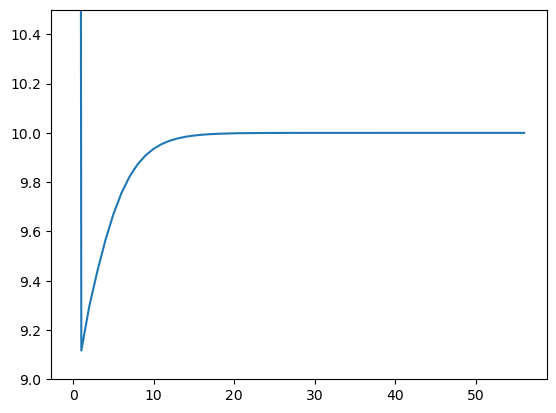

In [10]:
from matplotlib import pyplot as plt
plt.plot(test[3])
plt.ylim(9.0,10.5)
plt.show()

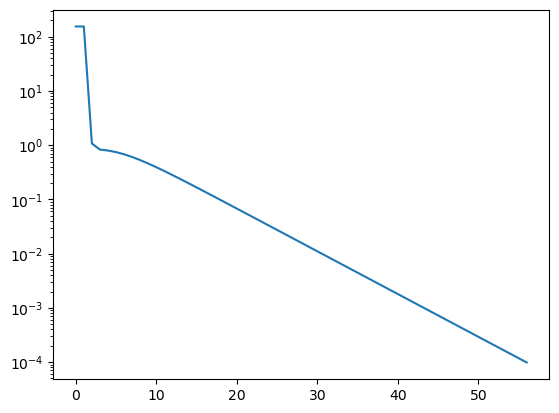

In [7]:
from matplotlib import pyplot as plt
plt.plot(test[4])
plt.yscale('log')
#plt.ylim(0,10.5)

plt.show()

#### Test

Run the following cell. If the power method is correctly implemented, then the test will pass.

In [8]:
def test_power_method():

    def test_engine(shape,epsilon):
        
        N = int(np.prod(shape))
        A , _ , _ = generate_positive_definite_matrix(N)
        
        def apply_A(v):
            assert isinstance(v,np.ndarray) , "v must be an np.ndarray"
            assert v.shape==shape , "v has shape "+str(v.shape)+", it must have shape "+str(shape)
            return np.asarray(np.dot(A,v.flatten())).reshape(shape)
        
        mu , v , niters = power_method(shape,apply_A,epsilon)
        delta = apply_A(v) - mu*v
        res = np.sqrt(np.vdot(delta,delta).real)
        print("shape = " , shape , "\tresidue = " , res , "\titerations = " , niters , "\tTest passes: " , res<=epsilon)
    
    
    test_engine((4,),1.e-8)
    test_engine((1,5),1.e-12)
    test_engine((3,2,4),1.e-8)
    test_engine((5,2),1.e-12)

test_power_method()

start vector shape:  (4,)


ValueError: too many values to unpack (expected 3)

### Conjugate gradient

**Task.**
1. Read about the conjugate gradient on Wikipedia.
2. Implement the conjugate gradient, using same conventions as for the power method.
3. Write a description of the algorithm here (in the same spirit as the description of the power method).
4. Run and pass the test provided below.
5. Discuss intermediate steps with tutors.

In [ ]:
# The function 'conjugate_gradient' calculates an approximation 'x' of 'A^{-1}(b)', where
# 'A' is a positive-definite linear map 'A', and 'b' is a vector in the domain of 'A'.
# The quality of the approximation is dictated by the tolerance 'epsilon', in the sense
# that the following inequality is satisfied
#   | A(x) - b | <= epsilon |b|
#
# The vectors over which 'A' acts are generically d-dimensional arrays. More precisely,
# they are instances of 'numpy.ndarray' with shape 'vshape'.
#
# The linear map 'A' is indirectly provided as a function 'apply_A' which takes a vector
# v and returns the vector A(v).
#
# Input parameters of power_method:
#    apply_A (function)     : function v -> A(v)
#    b (numpy.ndarray)      : vector 'b'
#    epsilon (float)        : tolerance
# Output values: (x, niters)
#    x (numpy.ndarray)      : approximation of 'A^{-1}(b)'
#    niters (int)           : number of iterations

def conjugate_gradient(apply_A,b,epsilon):

    ### Implement your function here
    
    return x, niters

In [ ]:
def test_conjugate_gradient():

    def test_engine(shape,epsilon):
        
        N = int(np.prod(shape))
        A , _ , _ = generate_positive_definite_matrix(N)
        b = rng.standard_normal(size=shape) + 1j * rng.standard_normal(size=shape)
        
        def apply_A(v):
            assert isinstance(v,np.ndarray) , "v must be an np.ndarray"
            assert v.shape==shape , "v has shape "+str(v.shape)+", it must have shape "+str(shape)
            return np.asarray(np.dot(A,v.flatten())).reshape(shape)
        
        x , niters = conjugate_gradient(apply_A,b,epsilon)
        delta = apply_A(x) - b
        res = np.sqrt(np.vdot(delta,delta).real)
        print("shape = " , shape , "\tresidue = " , res , "\titerations = " , niters , "\tTest passes: " , res<=epsilon*np.sqrt(np.vdot(b,b).real))
    
    
    test_engine((4,),1.e-8)
    test_engine((1,5),1.e-12)
    test_engine((3,2,4),1.e-8)
    test_engine((5,2),1.e-12)

test_conjugate_gradient()